Due: 2/02 23:59 to be submitted on Crowdmark.

# Q1 - Deciding whether to use LLMs in an Assignment (25 pts)

You are a TA and suspect that some students are submitting homework answers generated by a Large Language Model (LLM). You have a well-calibrated classifier that outputs $p(LLM|Submision)$ the probability that a given homework submission is generated by an LLM. You need to decide on one of five possible actions to take for each submission:


1. Accept (treat it as a legitimate student submission)
2. Suspect (mark it as suspicious and notify the student that it will be checked)
3. TA Review (manually review it more closely yourself)
4. Minor Penalty (tough grading)
5. Report to Professor (treat this as a severe offense)

Your students (and you) will experience different "losses" depending on which action you take and whether the submission is truly LLM-generated or actually genuine. The table below shows the new loss values:

Action   | LLM-Generated (True)        | Genuine Student Work (False)
-------- | ----------- | -----------
Accept| 10         | 0
Suspect    | 2          | 2
TA Review | 5             | 2
Minor Penalty  | 10           | 20
Report to Professor | 0           | 100

** In this course (STA414) you are allowed to use LLMs, this narrative is just an example question



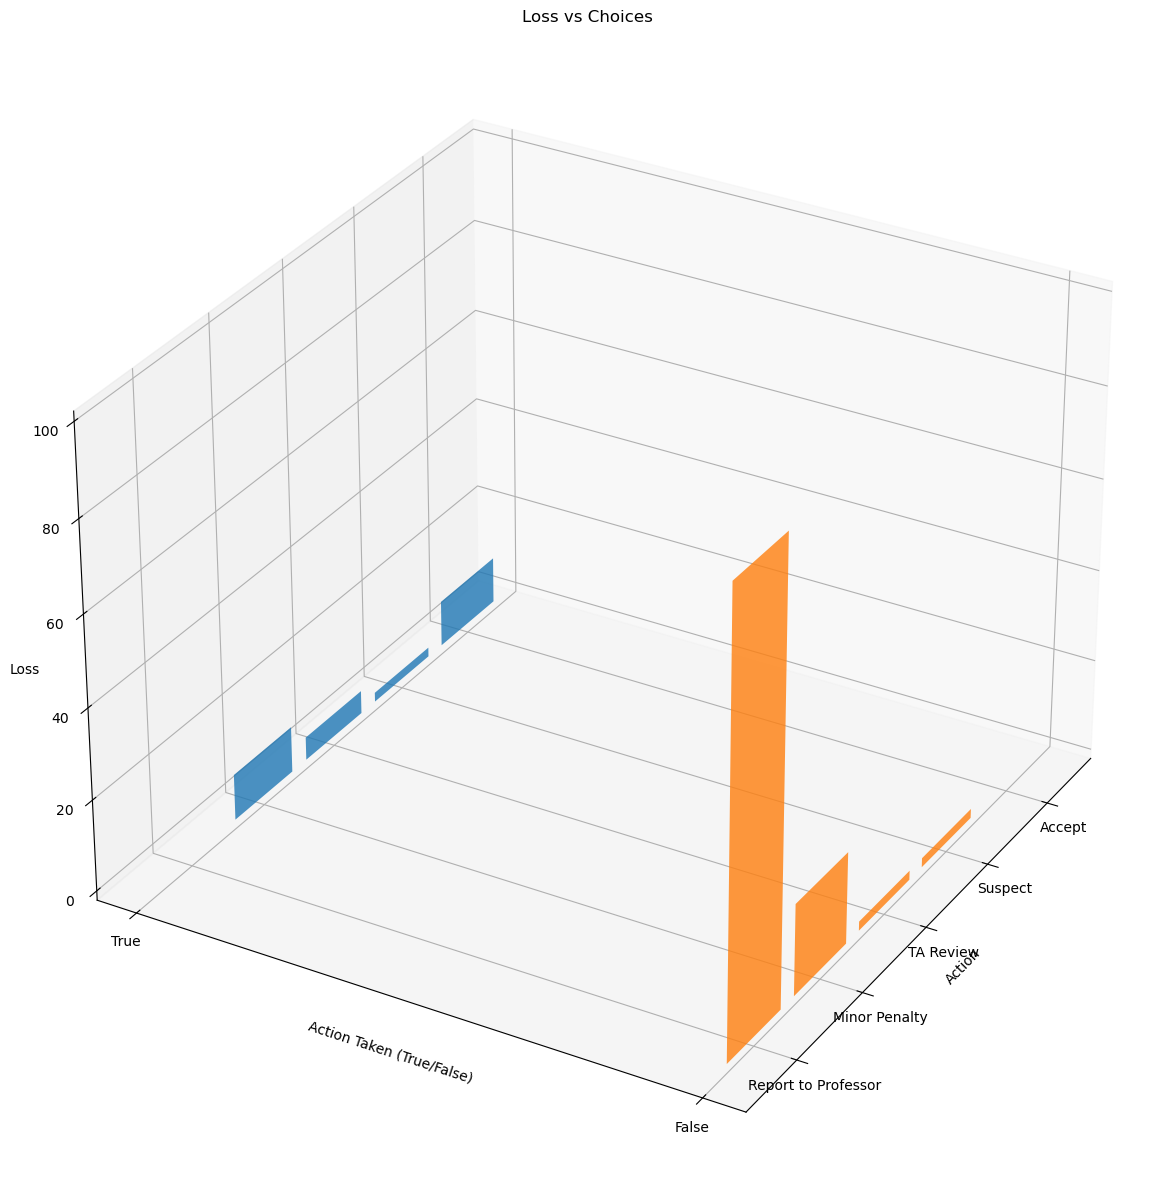

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
losses = [
    [10, 0],   # Accept
    [2, 2],    # Suspect
    [5, 2],    # TA Review
    [10, 20],  # Minor Penalty
    [0, 100]   # Report to Professor
]
action_names = ['Accept', 'Suspect', 'TA Review', 'Minor Penalty', 'Report to Professor']
num_actions = len(losses)

# Create a 3D bar chart
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for bar chart
x_vals = np.arange(num_actions)
z_vals = np.zeros(num_actions)  # Initialize y-values to 0
y_vals_true = [loss[0] for loss in losses]
y_vals_false = [loss[1] for loss in losses]

# Create bars for "True" condition
ax.bar(x_vals, y_vals_true, zs=z_vals, zdir='y', alpha=0.8)

# Create bars for "False" condition
ax.bar(x_vals, y_vals_false, zs=z_vals + 1, zdir='y', alpha=0.8)

# Label the axes
ax.set_xlabel('Action')
ax.set_ylabel('Action Taken (True/False)')
ax.set_zlabel('Loss')
ax.set_title('Loss vs Choices')

# Set x-ticks to action names
ax.set_xticks(x_vals)
ax.set_xticklabels(action_names)

# Set y-ticks to indicate True/False
ax.set_yticks([0, 1])
ax.set_yticklabels(['True', 'False'])

# Adjust view for better visibility
ax.view_init(elev=30, azim=30)

# Show the plot
plt.show()

## Q1.1
[6pts] Plot the expected wasted user time for each of the five possible actions, as a function of the probability of LLM generated: $p(LLM|submission)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

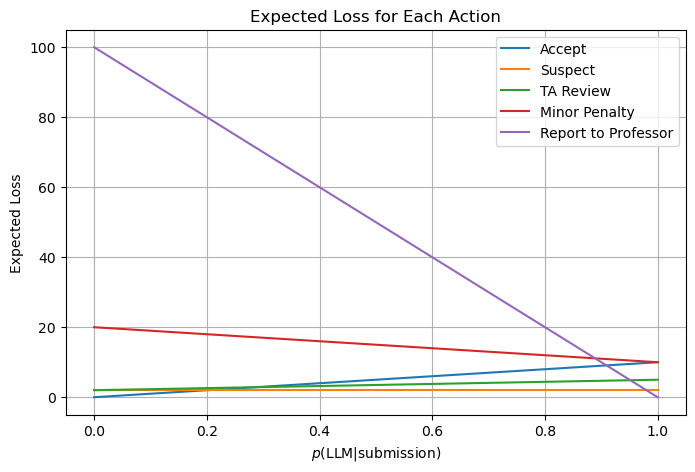

In [ ]:
losses = [
    [10, 0],   # Accept
    [2, 2],    # Suspect
    [5, 2],    # TA Review
    [10, 20],  # Minor Penalty
    [0, 100]   # Report to Professor
]
action_names = ['Accept', 'Suspect', 'TA Review', 'Minor Penalty', 'Report to Professor']
num_actions = len(losses)

def expected_loss_of_action(prob_llm, action):
    """
    prob_llm: probability that submission is LLM-generated (scalar or array)
    action: index of the chosen action
    """
    loss_true = losses[action][0]
    loss_false = losses[action][1]
    return prob_llm * loss_true + (1 - prob_llm) * loss_false

prob_range = np.linspace(0., 1., num=600)

plt.figure(figsize=(8, 5))
for action in range(num_actions):
    plt.plot(prob_range,
             expected_loss_of_action(prob_range, action),
             label=action_names[action])
plt.xlabel('$p(\mathrm{LLM}|\mathrm{submission})$')
plt.ylabel('Expected Loss')
plt.title('Expected Loss for Each Action')
plt.legend()
plt.grid(True)
plt.show()

## Q1.2
[4pts] Write a function that computes the optimal action given the probability of spam.

In [ ]:
def optimal_action(prob_llm):
    """
    Returns the index of the optimal action (i.e., the one that minimizes expected loss)
    for a given probability prob_llm.
    """
    # Compute expected losses for all actions
    expected_losses = [expected_loss_of_action(prob_llm, action) for action in range(num_actions)]
    return np.argmin(expected_losses)

## Q1.3
[8pts] Plot the expected loss of the optimal action as a function of the probability of spam.


Color the line according to the optimal action for that probability of spam.


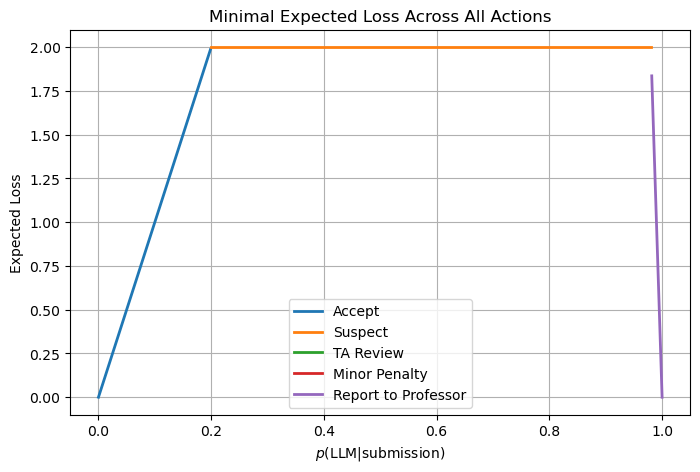

In [ ]:
optimal_actions = []
optimal_losses = []
for p in prob_range:
    # update here
    action = optimal_action(p)
    optimal_actions.append(action)
    optimal_losses.append(expected_loss_of_action(p, action))

plt.figure(figsize=(8, 5))
for i in range(num_actions):
    mask = np.array(optimal_actions) == i
    plt.plot(prob_range[mask], np.array(optimal_losses)[mask], label=action_names[i], lw=2)
# plt.plot(prob_range, optimal_losses, color='black', lw=2, label='Optimal Loss')
plt.xlabel('$p(\mathrm{LLM}|\mathrm{submission})$')
plt.ylabel('Expected Loss')
plt.title('Minimal Expected Loss Across All Actions')
plt.grid(True)
plt.legend()
plt.show()

## Q1.4
[7pts]
Finding the probability threshold at which we switch from Accept to any other action, given the original losses.

Raising the loss of incorrectly Accepting an LLM-generated submission so that the new threshold becomes $p(LLM|submission)<0.01$

Find the exact answer by hand using algebra.

[Type up your derivation here]
Your answer:
From the previous plot, we can only switch optimal action from `Accept` to `Suspect`.

For Expected Loss of `Accept`:

$L_{Accept} = p(LLM)*10+(1-p(LLM))*0 = 10p(LLM)$

For Expected Loss of `Suspect`:

$L_{Suspect} = p(LLM)*2+(1-p(LLM))*2 = 2$

To find the threshold, we let $L_{Accept} = L_{Suspect}$

Thus,

$10p(LLM) = 2$$ $$p(LLM) = 0.2$

So, the threshold to switch is $p(LLM)0.2$

Adjust:

Let the new loss to be $x$, $L_{Accept} = p(LLM)*x+(1-p(LLM))*0 = xp(LLM)$

To find the threshold, we let $L_{Accept} = L_{Suspect}$

$xp(LLM) = 2$ where $p(LLM) = 0.01$  $$x = 200$$

# Q2 - A Generative Model for Pokemon Unown (50 pts)

![](https://github.com/lopeLH/unown-mnist/blob/main/doc/examples.png?raw=true)


In this question, we'll fit a Bernoulli Naïve Bayes model to the pokemon dataset, and use this model for making predictions and generating new images from the same distribution. pokemon is a dataset of 28x28 images of items of pokemon symbols.

We represent each image by a vector $x^{(i)} \in \{0,1\}^{D}$, where 0 and 1 represent white and black pixels respectively, and $D=784$. Each class label $c^{(i)}$ is a different item of clothing, which in the code is represented by a K=28-dimensional one-hot vector.

The Bernoulli Naïve Bayes model parameterized by $\theta$ and $\pi$ defines the following joint probability of $x$ and $c$,
$$p(x,c|\theta,\pi) = p(c|\pi)p(x|c,\theta) = p(c|\pi)\prod_{j=1}^{D}p(x_j|c,\theta),$$
where $x_j | c,\theta \sim \operatorname{Bernoulli}(\theta_{jc})$, i.e. $p(x_j | c,\theta) = \theta_{jc}^{x_j}(1-\theta_{jc})^{1-x_j}$, and $c|\pi$ follows a simple categorical distribution, i.e. $p(c|\pi) = \pi_c$.

We begin by learning the parameters $\theta$ and $\pi$.

First The following code will download and prepare the training and test sets.

In [1]:
import numpy as np
import os
import gzip
import struct
import array
import matplotlib.pyplot as plt
import matplotlib.image
from urllib.request import urlretrieve

def download(url, filename):
    if not os.path.exists('data'):
        os.makedirs('data')
    out_file = os.path.join('data', filename)
    if not os.path.isfile(out_file):
        urlretrieve(url, out_file)


def unown_mnist():
    base_url = 'https://github.com/lopeLH/unown-mnist/raw/refs/heads/main/'
    X_test_url = 'X_test.npy'
    X_train_url = 'X_train.npy'
    y_train_url = 'Y_train.npy'
    y_test_url = 'Y_test.npy'

    for filename in [X_train_url,X_test_url,
                     y_train_url,y_test_url]:
        download(base_url + filename, filename)

    X_train =  np.load('./data/X_train.npy')
    X_test =  np.load('./data/X_test.npy')
    Y_train =  np.load('./data/Y_train.npy')
    Y_test =  np.load('./data/Y_test.npy')

    return X_train,Y_train, X_test, Y_test

def load_unown_mnist():
    partial_flatten = lambda x: np.reshape(x, (x.shape[0], np.prod(x.shape[1:])))

    one_hot = lambda x, k: np.array(x[:, None] == np.arange(k)[None, :], dtype=int)
    train_images, train_labels, test_images, test_labels = unown_mnist()
    num_unique_labels = len(np.unique(train_labels))
    train_images = (partial_flatten(train_images) / 255.0).astype(float)
    test_images = (partial_flatten(test_images) / 255.0).astype(float)
    train_images_binarized = (train_images > 0.5).astype(float)
    test_images_binarized = (test_images > 0.5).astype(float)
    train_labels = one_hot(train_labels, num_unique_labels)
    test_labels = one_hot(test_labels, num_unique_labels)
    N_data = train_images.shape[0]

    return N_data, train_images, train_images_binarized, train_labels, test_images, test_images_binarized, test_labels

In [2]:
N_data, train_images, train_images_binarized, train_labels, test_images, test_images_binarized, test_labels = load_unown_mnist()

In [3]:
X_train,Y_train, X_test, Y_test = unown_mnist()
#print(np.unique(Y_train))
len(train_labels[0])

28

## Q2.1
[4pts] Derive the expression for the Maximum Likelihood Estimator (MLE) of $\theta$ and $\pi$.

$$L(\theta, \pi) = \prod_{i=1}^{N} p(x^{(i)}, c^{(i)} | \theta, \pi)$$
$$L(\theta, \pi) = \prod_{i=1}^{N} \pi_{c^{(i)}} \prod_{j=1}^{D} \theta_{j c^{(i)}}^{x_j^{(i)}} (1 - \theta_{j c^{(i)}})^{1 - x_j^{(i)}}$$
$$\log L(\theta, \pi) = \sum_{i=1}^{N} \log \pi_{c^{(i)}} + \sum_{i=1}^{N} \sum_{j=1}^{D} \Big[ x_j^{(i)} \log \theta_{j c^{(i)}} + (1 - x_j^{(i)}) \log (1 - \theta_{j c^{(i)}}) \Big]$$
$$\log L(\theta, \pi) = \sum_{i=1}^{N} \log \pi_{c} * 1(c=c^{(i)}) + \sum_{i=1}^{N} \sum_{j=1}^{D} \Big[ x_j^{(i)} \log \theta_{j c^{(i)}} + (1 - x_j^{(i)}) \log (1 - \theta_{j c^{(i)}}) \Big]$$
For $\pi_c$, $\sum_{c} \pi_c = 1$, so with lagrange:
$$\frac{\partial}{\partial \pi_c} \sum_{i=1}^{N} \log \pi_{c^{(i)}} - \lambda \left( \sum_c \pi_c - 1 \right) = 0$$
$$\sum_{i=1}^{N} \frac{1(c=c^{(i)})}{\pi_c} - \lambda = 0$$
$$\pi_c = \frac{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)}{\lambda}$$
Let $N_c = \sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)$ $\sum_{c} \pi_c = 1$
$$\sum_c \frac{N_c}{\lambda} = 1$$
$$\lambda = \sum_c N_c = N$$
$$\hat{\pi_c} = \frac{N_c}{N}$$

For $\theta_{jc}$
$$\frac{\partial}{\partial \theta_{jc}} \sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c) \Big[ x_j^{(i)} \log \theta_{jc} + (1 - x_j^{(i)}) \log (1 - \theta_{jc}) \Big] = 0$$
$$\theta_{jc} = \frac{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c) x_j^{(i)}}{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)}$$
$$\hat{\theta_{jc}} = \frac{\sum_{i: c^{(i)} = c} x_j^{(i)}}{N_c}$$
$$\hat{\pi_c} = \frac{N_c}{N}, \quad
\hat{\theta_{jc}} = \frac{\sum_{i: c^{(i)} = c} x_j^{(i)}}{N_c}
$$

## Q2.2
[5pts] Using the MLE for this data, many entries of $\theta$ will be estimated to be 0, which seems extreme. So we look for another estimation method.

Assume the prior distribution of $\theta$ is such that the entries are i.i.d. and drawn from $\operatorname{Beta}(\alpha,\alpha)$. Derive the Maximum A Posteriori (MAP) estimator for $\theta$ (it has a simple final form). You can return the MLE for $\pi$ in your implementation. From now on, we will work with this estimator.

[Type up your derivation here]

Your answer:
$$p(\theta| x, c) \propto p(x, c| \theta) p(\theta)$$
$$\theta_{j,c} \sim \text{Beta}(\alpha, \alpha)$$
$$p(\theta_{j,c}) = \frac{\Gamma(2\alpha)}{\Gamma(\alpha) \Gamma(\alpha)} \theta_{j,c}^{\alpha-1} (1 - \theta_{j,c})^{\alpha-1}, \quad 0 \leq \theta_{j,c} \leq 1$$
$$p(x, c| \theta) \propto \prod_{i=1}^{N} \prod_{j=1}^{D} \left[ p(x_j^{(i)} \mid c^{(i)}, \theta) \right]$$
$$p(x_j^{(i)} \mid c^{(i)}, \theta) = \theta_{j, c^{(i)}}^{x_j^{(i)}} (1 - \theta_{j, c^{(i)}})^{1 - x_j^{(i)}}
$$
$$\log p(\theta| x, c) = \log p(x, c| \theta) + \log p(\theta)$$
$$\log p(\theta | x, c) \propto \sum_{i=1}^{N}  \sum_{j=1}^{D} \left[ x_j^{(i)} \log \theta_{j, c^{(i)}} + (1 - x_j^{(i)}) \log (1 - \theta_{j, c^{(i)}}) \right] + \sum_{j=1}^{D} \sum_{i=1}^{N} \left[ (\alpha - 1) \log \theta_{j,c^{(i)}} + (\alpha - 1) \log (1 - \theta_{j,c^{(i)}}) \right]$$
$$\log p(\theta_{j,c} | x, c) \propto \sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c) \{\left[ x_j^{(i)} \log \theta_{j,c} + (1 - x_j^{(i)}) \log (1 - \theta_{j,c}) \right] + (\alpha - 1) \log \theta_{j,c} + (\alpha - 1) \log (1 - \theta_{j,c})\}$$
$$\frac{\partial}{\partial \theta_{j,c}} \log p(\theta_{j,c} | x, c) \propto \frac{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)[x_j^{(i)} + (\alpha - 1)]}{\sum_{i=1}^{N}\mathbb{1}(c^{(i)} = c)\theta_{j,c}} - \frac{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)[(1 - x_j^{(i)}) + (\alpha - 1)]}{\sum_{i=1}^{N}\mathbb{1}(c^{(i)} = c)(1 - \theta_{j,c})}$$
$$\frac{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)[x_j^{(i)} + (\alpha - 1)]}{\sum_{i=1}^{N}\mathbb{1}(c^{(i)} = c)\theta_{j,c}} = \frac{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)[(1 - x_j^{(i)}) + (\alpha - 1)]}{\sum_{i=1}^{N}\mathbb{1}(c^{(i)} = c)(1 - \theta_{j,c})}$$
$$\hat{\theta}_{j,c} = \frac{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)[x_j^{(i)} + (\alpha - 1)]}{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)x_j^{(i)} + \sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c)[(1 - x_j^{(i)}) + 2(\alpha - 1)]}$$
$$\hat{\theta}_{j,c} = \frac{\sum_{i=1}^{N}\mathbb{1}(c^{(i)} = c) [x_j^{(i)} + (\alpha - 1)]}{\sum_{i=1}^{N} \mathbb{1}(c^{(i)} = c) (2\alpha - 1)}$$
$$\hat{\theta}_{j,c} = \frac{\sum_{i: c^{(i)} = c} [x_j^{(i)} + (\alpha - 1)]}{N_c (2\alpha - 1)}$$


In [10]:
def train_map_estimator(train_images, train_labels, alpha):
    """ Inputs:
        train_images (N_samples x N_features)
        train_labels (N_samples x N_classes)
        alpha (float)
        Returns the MAP estimator theta_est (N_features x N_classes) and the MLE
        estimator pi_est (N_classes)"""


    N_samples, N_features = train_images.shape
    _, N_classes = train_labels.shape

    # Compute class counts
    class_counts = np.sum(train_labels, axis=0)

    # Compute MAP estimator for theta
    theta_est = (train_images.T @ train_labels + class_counts * (alpha - 1)) / (class_counts * (2 *alpha - 1))

    # Compute MLE estimator for pi
    pi_est = class_counts / N_samples

    return theta_est, pi_est

## Q2.3
a) [4pts] Derive an expression for the class log-likelihood $\log p(c|x,\theta,\pi)$ for a single image. Then, complete the implementation of the following functions. Recall that our prediction rule is to choose the class that maximizes the above log-likelihood, and accuracy is defined as the fraction of samples that are correctly predicted.

Report the average log-likelihood $\frac{1}{N}\sum_{i=1}^{N}\log p(c^{(i)}|x^{(i)},\hat{\theta},\hat{\pi})$ (where $N$ is the number of samples) on the training test, as well the training and test errors. Use a value of $\alpha = 2$.

[Type up your derivation here]

Your answer:

$$\log p(c | x, \theta, \pi) = \log \frac{p(x , c| \pi, \theta)}{p(x | \theta, \pi)} = \log \frac{p(x | c, \theta) p(c | \pi)}{p(x | \theta, \pi)}$$
$$\log p(c | x, \theta, \pi) \propto \log p(x | c, \theta) + \log p(c | \pi)$$
$$\log p(c | x, \theta, \pi) = \log \pi_c + \sum_{j=1}^{D} \left[ x_j \log \theta_{j,c} + (1 - x_j) \log (1 - \theta_{j,c}) \right]
$$

In [11]:
def log_likelihood(images, theta, pi):
    """ Inputs: images (N_samples x N_features), theta, pi
        Returns the matrix 'log_like' of loglikehoods over the input images where
        log_like[i,c] = log p (c |x^(i), theta, pi) using the estimators theta and pi.
        log_like is a matrix of (N_samples x N_classes)
    Note that log likelihood is not only for c^(i), it is for all possible c's."""

    # Compute log priors (log pi_c)
    log_pi = np.log(pi)  # Shape: (N_classes,)

    # Compute log likelihood of features given class
    log_theta = np.log(theta)      # Shape: (N_features x N_classes)
    log_1_minus_theta = np.log(1 - theta)  # Shape: (N_features x N_classes)

    # Compute log p(x | c, theta) for all samples and all classes
    log_px_given_c = images @ log_theta + (1 - images) @ log_1_minus_theta  # (N_samples x N_classes)

    # Compute total log likelihood log p(c | x, theta, pi)
    log_like = log_px_given_c + log_pi  # (N_samples x N_classes)

    return log_like


def accuracy(log_like, labels):
    """ Inputs: matrix of log likelihoods and 1-of-K labels (N_samples x N_classes)
    Returns the accuracy based on predictions from log likelihood values"""

    # Get predicted class (argmax over log likelihoods)
    predicted_classes = np.argmax(log_like, axis=1)

    # Get actual class (argmax over one-hot labels)
    true_classes = np.argmax(labels, axis=1)

    # Compute accuracy
    return np.mean(predicted_classes == true_classes)


N_data, train_images, train_images_binarized, train_labels, test_images, test_images_binarized, test_labels = load_unown_mnist()

theta_est, pi_est = train_map_estimator(train_images_binarized, train_labels, alpha=2.)

loglike_train = log_likelihood(train_images_binarized, theta_est, pi_est)
avg_loglike = np.sum(loglike_train * train_labels) / N_data
train_accuracy = accuracy(loglike_train, train_labels)
loglike_test = log_likelihood(test_images_binarized, theta_est, pi_est)
test_accuracy = accuracy(loglike_test, test_labels)

print(f"Average log-likelihood for MAP with alpha = 2 is {avg_loglike:.3f}")
print(f"Training accuracy for MAP with alpha = 2 is {train_accuracy:.3f}")
print(f"Test accuracy for MAP with alpha = 2 is {test_accuracy:.3f}")

Average log-likelihood for MAP with alpha = 2 is -376.990
Training accuracy for MAP with alpha = 2 is 0.962
Test accuracy for MAP with alpha = 2 is 0.961


b) [2pts] Now compute the MAP estimators using $\alpha = 1$. Then rerun the code for computing the log-likelihoods and accuracy.

What do you observe? - comment on whether it was important or not to use the MAP (with $\alpha > 1$). Based on your previous derivation, what does $\alpha = 1$ correspond to?

(Note: You do not need to report the average log-likelihoods or accuracy in this part.)

In [ ]:
theta_alpha1_est, pi_est = train_map_estimator(train_images_binarized, train_labels, alpha=1.)

loglike_train = log_likelihood(train_images_binarized, theta_alpha1_est, pi_est)
avg_loglike = np.sum(loglike_train * train_labels) / N_data
train_accuracy = accuracy(loglike_train, train_labels)
loglike_test = log_likelihood(test_images_binarized, theta_alpha1_est, pi_est)
test_accuracy = accuracy(loglike_test, test_labels)

print(f"Average log-likelihood for MAP with alpha = 1 is {avg_loglike:.3f}")
print(f"Training accuracy for MAP with alpha = 1 is {train_accuracy:.3f}")
print(f"Test accuracy for MAP with alpha = 1 is {test_accuracy:.3f}")

/tmp/ipykernel_71/3535882648.py:12: RuntimeWarning: divide by zero encountered in log
  log_theta = np.log(theta)      # Shape: (N_features x N_classes)
/tmp/ipykernel_71/3535882648.py:13: RuntimeWarning: divide by zero encountered in log
  log_1_minus_theta = np.log(1 - theta)  # Shape: (N_features x N_classes)
/tmp/ipykernel_71/3535882648.py:16: RuntimeWarning: invalid value encountered in matmul
  log_px_given_c = images @ log_theta + (1 - images) @ log_1_minus_theta  # (N_samples x N_classes)


Average log-likelihood for MAP with alpha = 1 is nan
Training accuracy for MAP with alpha = 1 is 0.036
Test accuracy for MAP with alpha = 1 is 0.033


[Type up your answer here.]

I observe errors and warnings as the estimated $\hat{\theta}$ is 0 for some cases. Thus, it is important to use the MAP (with $\alpha > 1$) to avoid the zero estimates. When $\alpha = 1$, the MAP estimator is the same as the MLE estimator of $\theta$ as the prior of Beta(1,1) is just Uniform distribution.

## Q2.4
[2pts] Given this model's assumptions, is it always true that any two pixels $x_i$ and $x_j$ with $i \neq j$ are independent:
- when conditioned on $c$?
- after marginalizing over $c$?
- when unconditioned on $c$?

Provide brief justification for your answers.

[Type up your answer here]

Your answer:

When conditioned on c, two pixels are independent. This is because the Bernoulli Naïve Bayes model assumes conditional independence of the pixels given the class label c.

After marginalizing over c, two pixels can be dependent as different classes can create dependencies.

When unconditioned on c, pixel correlations emerge due to class influences. So two pixels can be dependent.

## Q2.5
[3pts]
- How many parameters need to be estimated in the Bernoulli Naive Bayes model?
- How many parameters need to be estimated, if we remove the Naive Bayes assumption?

Briefly justify your answers.

[Type up your answer here]

1. In the Bernoulli Naïve Bayes model:

Each image has 784 features and there are 28 classes.

For the first part in the probability, $p(c) = \pi_c$. Thus we have 28 $\pi_c$s. Since they sum to 1, we need 28-1=27 parameters. For the second part, each of the 784 features (number of Js) has a Bernoulli probability per class. Thus, the total number of parameters is number of Is times number of Js, which is 784*28. In total, we have $27+784*28$ parameters.

2. Remove the Naïve Bayes assumption:

From the second part of the probability, we must estimate a probability for all possible $2^{784}$ combinations of pixels per class. Thus, we need $27+2^{784}*28$ paramters



## Q2.6
[4pts] Since we have a generative model for our data, we can do more than just prediction. Randomly sample and plot 10 images from the learned distribution using the MAP estimates. (Hint: You first need to sample the class $c$, and then sample pixels conditioned on $c$.)

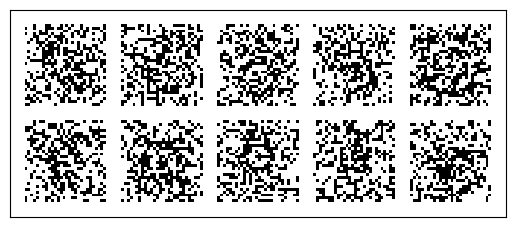

In [ ]:
def image_sampler(theta, pi, num_images):
    """ Inputs: parameters theta and pi, and number of images to sample
    Returns the sampled images (N_images x N_features)"""

    # Get the number of classes (K) and number of features (D)
    K = pi.shape[0]
    D = theta.shape[0]

    # Initialize an array to store the sampled images
    sampled_images = np.zeros((num_images, D))

    for i in range(num_images):
        # Step 1: Sample a class c from the class distribution pi
        c = np.random.choice(K, p=pi)

        # Step 2: For each pixel, sample from the Bernoulli distribution
        # conditioned on the class c
        for j in range(D):
            sampled_images[i, j] = np.random.binomial(1, theta[j, c])

    return sampled_images


def plot_images(images, ims_per_row=5, padding=5, image_dimensions=(28, 28),
                cmap=matplotlib.cm.binary, vmin=0., vmax=1.):
    """Images should be a (N_images x pixels) matrix."""
    fig = plt.figure(1)
    fig.clf()
    ax = fig.add_subplot(111)

    N_images = images.shape[0]
    N_rows = np.int32(np.ceil(float(N_images) / ims_per_row))
    pad_value = vmin
    concat_images = np.full(((image_dimensions[0] + padding) * N_rows + padding,
                             (image_dimensions[1] + padding) * ims_per_row + padding), pad_value)
    for i in range(N_images):
        cur_image = np.reshape(images[i, :], image_dimensions)
        row_ix = i // ims_per_row
        col_ix = i % ims_per_row
        row_start = padding + (padding + image_dimensions[0]) * row_ix
        col_start = padding + (padding + image_dimensions[1]) * col_ix
        concat_images[row_start: row_start + image_dimensions[0],
                      col_start: col_start + image_dimensions[1]] = cur_image
        cax = ax.matshow(concat_images, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

    plt.plot()


sampled_images = image_sampler(theta_est, pi_est, 10)
plot_images(sampled_images)

## Q2.7
[5pts] One of the advantages of generative models is that they can handle missing data, or be used to answer different sorts of questions about the model. Assume we have only observed some pixels of the image. Let $x_E = \left\{x_p : \text{pixel p is observed}\right\}$. Derive an expression for $p(x_j|x_E,\theta,\pi)$, the conditional probability of an unobserved pixel $j$ given the observed pixels and distribution parameters. (Hint: You have to marginalize over $c$.)

[Type up your derivation here]

Your answer:

First, marginalize over c:

$$p(x_j | x_E, \theta, \pi) = \sum_{c=1}^K p(x_j | x_E, c, \theta, \pi) \cdot p(c | x_E, \theta, \pi)$$

Given c, $x_j$ and $x_E$ are independent.

$$p(x_j | x_E, c, \theta, \pi) = p(x_j | c, \theta) = \theta_{jc}^{x_j} (1 - \theta_{jc})^{1 - x_j}$$

$$p(c | x_E, \theta, \pi) \propto p(x_E | c, \theta) p(c | \pi) \propto \pi_c \prod_{p \in E} \theta_{p, c}^{x_p} (1 - \theta_{p, c})^{1 - x_p}$$

$$p(x_j | x_E, \theta, \pi) = \sum_{c=1}^{K} \left[ \prod_{p \in E} \theta_{p, c}^{x_p} (1 - \theta_{p, c})^{1 - x_p} \right] \left[\theta_{jc}^{x_j} ( 1 - \theta_{jc})^{1 - x_j} \right] \pi_c$$


## Q2.8
a) [5pts] We assume that only 30% of the pixels are observed. For the first 30 images in the training set, plot the images when the unobserved pixels are left as white, as well as the same images when the unobserved pixels are filled with the marginal probability of the pixel being 1 given the observed pixels, i.e. the value of the unobserved pixel $j$ is $p(x_j = 1|x_E,\theta,\pi)$.

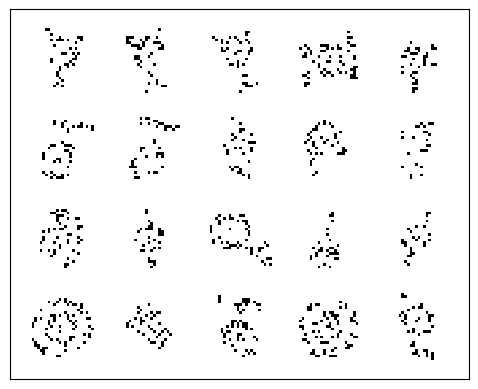

In [ ]:
def probabilistic_imputer(theta, pi, original_images, is_observed):
    """Inputs: parameters theta and pi, original_images (N_images x N_features),
        and is_observed which has the same shape as original_images, with a value
        1. in every observed entry and 0. in every unobserved entry.
    Returns the new images where unobserved pixels are replaced by their
    conditional probability"""

    num_classes = pi.shape[0]  # Number of classes
    num_images, num_features = original_images.shape
    imputed_images = original_images.copy()

    # Compute p(c | x_E, theta, pi) for each image
    log_posterior = np.zeros((num_images, num_classes))

    for c in range(num_classes):
        log_posterior[:, c] = np.log(pi[c]) + np.sum(
            np.log(theta[:, c]) * original_images * is_observed +
            np.log(1 - theta[:, c]) * (1 - original_images) * is_observed,
            axis=1
        )

    log_posterior -= log_posterior.max(axis=1, keepdims=True)  # Stability trick
    posterior = np.exp(log_posterior)
    posterior /= posterior.sum(axis=1, keepdims=True)

    # Compute p(x_j = 1 | x_E, theta, pi)
    for j in range(num_features):
        if np.any(is_observed[:, j] == 0):  # Only update unobserved pixels
            p_xj_given_xE = (theta[j, :] @ posterior.T).T  # Weighted sum over classes
            imputed_images[:, j] = np.where(is_observed[:, j], original_images[:, j], p_xj_given_xE)

    return imputed_images



num_features = train_images_binarized.shape[1]
is_observed = np.random.binomial(1, p=0.3, size=(20, num_features))
plot_images(train_images_binarized[:20] * is_observed)

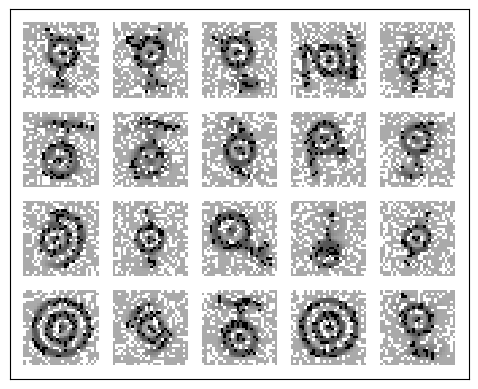

In [ ]:
imputed_images = probabilistic_imputer(theta_est, pi_est, train_images_binarized[:20], is_observed)
plot_images(imputed_images)

b) [2pts] Now suppose instead of choosing the 30% observed pixels at random, we constructed a grid with roughly evenly spaced observed pixels, as follows:

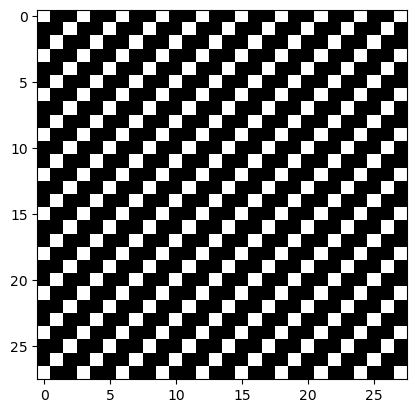

In [ ]:
h, w = 28, 28
p = 0.3

num_pixels = h * w
num_indices = int(num_pixels * p)

step_size = num_pixels // num_indices

indices = [(i // w, i % w) for i in range(0, num_pixels, step_size)]
flattened_indices = [row * w + col for row, col in indices]

one_hot_indices = np.zeros(num_pixels, dtype=int)
for index in flattened_indices:
    one_hot_indices[index] = 1

one_hot_matrix = one_hot_indices.reshape(h, w)

import matplotlib.pyplot as plt
plt.imshow(one_hot_matrix, cmap='gray')
plt.show()

Next we impute as before, except using this grid of observed indices.

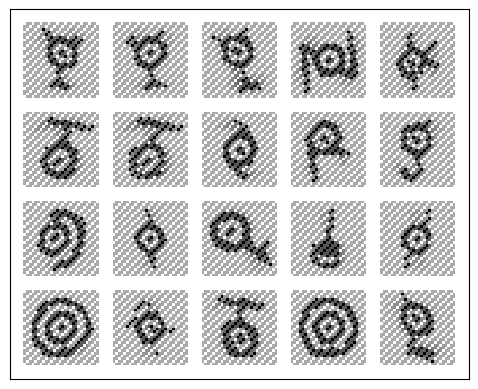

In [ ]:
repeated_one_hot_indices = np.tile(one_hot_indices, (20, 1))
imputed_images = probabilistic_imputer(theta_est, pi_est, train_images_binarized[:20], repeated_one_hot_indices)
plot_images(imputed_images)

Compare the resulting images you found when using the probabilistic_imputer in part 2.8 a) (random 30% observed) and 2.8 (evenly spaced 30% observed).

What do you find? Why might one of the two resulting samples of images be better than the other?
(Hint: consider what the spatial properties of naturally occuring images are.)\
You can use the following ground truth images to help inform your answer.

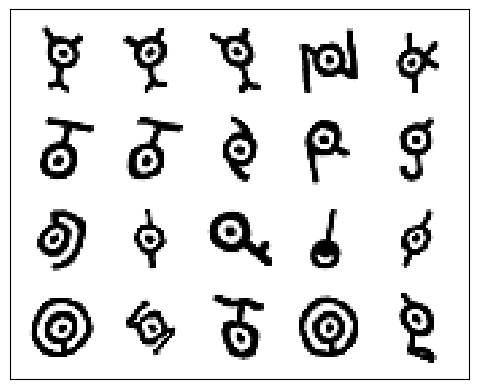

In [ ]:
plot_images(train_images[:20])

The second method results in better image reconstruction compared to the randomly choosing method. This is because with evenly spaced observed pixels, we ensure that information is available across the entire image. Randomly chosen pixels could result in large unobserved gaps, making it harder to infer missing details.

## Q2.9

We now consider the Gaussian Naïve Bayes model, parameterized by $\mu$, $\Sigma$, $\pi$, to model the pixel data. Thus we revert back to representing each data sample using a continuous range of values, i.e. $x^{(i)} \in \mathbb{R}^{D}$, and we no longer use the binarized version of the data samples. (Note that in reality $x^{(i)} \in \left[0,1\right]^{D}$, but for the purposes of this question we will ignore this.) Here the joint probability distribution of $x$ and $c$ is given by $$p(x,c|\mu,\Sigma,\pi) =  p(c|\pi)p(x|c,\mu,\Sigma) = p(c|\pi)p(x|c,\mu,\Sigma),$$ where $p(x | c,\mu,\Sigma) = \frac{1}{\sqrt{\left(2\pi\right)^{D}|\Sigma_{c}|}}\exp\left(-\frac{1}{2}\left(x-\mu_{c}\right)^{T}\Sigma_{c}^{-1}\left(x-\mu_{c}\right)\right)$. As before $c|\pi$ follows a simple categorical distribution, i.e. $p(c|\pi) = \pi_c$.

[1pts] Recall in general for the normal distribution, $\Sigma_{c} \in \mathbb{R}^{D,D}$. What special form does $\Sigma_{c}$ take, in context of the Naive Bayes assumption?

[Type your answer here.]

The covariance matrix takes a diagonal form. Because the features are conditionally independent given the class. This implies that there are no off-diagonal terms in the covariance matrix.

[7pts] Derive the maximum likelihood estimates of $\mu_{c}$, $\Sigma_{c},\pi_{c}$ for all $c \in \left\{1, \ldots, 10\right\}$, then fill in the code block below with the implementation.\
(Hint: it is normal if you use a single for loop over the computation of each $\Sigma_{c}$)

Let $\Sigma_c = \text{diag}(\sigma_{c1}^2, \sigma_{c2}^2, \dots, \sigma_{cD}^2)$
$$p(x | c, \mu_c, \Sigma_c) = \prod_{d=1}^{D} N(x_d | \mu_{cd}, \sigma_{cd}^2)$$
where each feature $ x_d $ is modeled as:
$$N(x_d | \mu_{cd}, \sigma_{cd}^2) = \frac{1}{\sqrt{2\pi\sigma_{cd}^2}} \exp \left( -\frac{(x_d - \mu_{cd})^2}{2\sigma_{cd}^2} \right)$$
$$L(\mu, \Sigma, \pi) = \prod_{i=1}^{N} p(c^{(i)} | \pi) p(x^{(i)} | c^{(i)}, \mu_{c^{(i)}}, \Sigma_{c^{(i)}}) = \prod_{i=1}^{N} \pi_{c^{(i)}} \prod_{d=1}^{D} N(x_d^{(i)} | \mu_{c^{(i)}d}, \sigma_{c^{(i)}d}^2)$$
$$\log L = \sum_{i=1}^{N} \left[ \log \pi_{c^{(i)}} - \sum_{d=1}^{D} \left( \frac{1}{2} \log (2\pi\sigma_{c^{(i)}d}^2) + \frac{(x_d^{(i)} - \mu_{c^{(i)}d})^2}{2\sigma_{c^{(i)}d}^2} \right) \right]$$
$$\frac{\partial \log L}{\partial \mu_{cd}} = \sum_{i: c^{(i)}=c} \frac{x_d^{(i)} - \mu_{cd}}{\sigma_{cd}^2} = 0$$
$$\mu_{cd} = \frac{1}{N_c} \sum_{i: c^{(i)}=c} x_d^{(i)}$$
Thus, $\hat{\mu_c} = \frac{1}{N_c} \sum_{i: c^{(i)}=c} x^{(i)}$
$$\frac{\partial \log L}{\partial \sigma_{cd}^2} = \sum_{i: c^{(i)}=c} \left( -\frac{1}{2\sigma_{cd}^2} + \frac{(x_d^{(i)} - \mu_{cd})^2}{2\sigma_{cd}^4} \right) = 0$$
$$\sigma_{cd}^2 = \frac{1}{N_c} \sum_{i: c^{(i)}=c} (x_d^{(i)} - \mu_{cd})^2$$
Thus, $\hat{\Sigma_c} = \text{diag} \left( \frac{1}{N_c} \sum_{i: c^{(i)}=c} (x^{(i)} - \mu_c) \odot (x^{(i)} - \mu_c) \right)$ where $ \odot $ denotes element-wise multiplication.

Similiar to Q2.1,
$$\hat{\pi_c} = \frac{N_c}{N}$$


In [7]:
def train_gnb_mle_estimator(train_images, train_labels, epsilon=1e-6):
    """ Inputs:
        train_images (N_samples x N_features)
        train_labels (N_samples x N_classes)
        Returns the MLE estimators mu_est, sigma_est, pi_est.
    """
    num_samples, num_features = train_images.shape  # N_samples, N_features
    num_classes = train_labels.shape[1]  # N_classes (one-hot encoded labels)

    # Initialize estimates
    mu_est = np.zeros((num_classes, num_features))  # Means for each class
    sigma_est = np.zeros((num_classes, num_features))  # Variances for each feature per class
    pi_est = np.zeros(num_classes)  # Prior probabilities for each class

    # Iterate over each class to compute the MLE estimates
    for c in range(num_classes):
        # Get all samples that belong to class c (one-hot encoded labels)
        X_c = train_images[train_labels[:, c] == 1]  # All samples for class c
        N_c = X_c.shape[0]  # Number of samples in class c

        # Compute the prior probability for class c
        pi_est[c] = N_c / num_samples

        # Compute the class mean (mu_c) for each feature
        mu_est[c] = np.mean(X_c, axis=0)

        # Compute the class variance (sigma_c^2) for each feature, adding epsilon for numerical stability
        # Element-wise variance
        sigma_est[c] = np.var(X_c, axis=0) + epsilon

    return mu_est, sigma_est, pi_est

## Q2.10
[6pts] Similar to before, derive an expression for the class log-likelihood $\log p(c|x,\mu,\Sigma,\pi)$ for a single image. Then, complete the implementation for computing the log_likelihoods.

As before report the average log-likelihood $\frac{1}{N}\sum_{i=1}^{N}\log p(c^{(i)}|x^{(i)},\hat{\theta},\hat{\pi})$ (where $N$ is the number of samples) on the training test, as well the training and test errors. Use the accuracy function you implemented earlier.

Note: Here because we did not find the MAP estimators for $\mu, \Sigma$ we use a technique called variance smoothing, which adds a small value $\epsilon$ to $\Sigma$ in the implementation, before computing the log-likelihoods. The subsequent part of this question comments on what one might expect if they used the MAP estimators.

$$p(c|x,\mu_c,\Sigma_c,\pi) \propto p(c,x|\mu_c,\Sigma_c,\pi) \propto p(x|c,\mu_c,\Sigma_c) p(c|\pi)$$
$$p(c|x,\mu_c,\Sigma_c,\pi) \propto \prod_{d=1}^{D} N(x_d | \mu_{cd}, \sigma_{cd}^2) * \pi_c$$
$$L(\mu, \Sigma, \pi) = p(c|x,\mu_c,\Sigma_c,\pi) \propto \prod_{d=1}^{D} \frac{1}{\sqrt{2\pi\sigma_{cd}^2}} \exp \left( -\frac{(x_d - \mu_{cd})^2}{2\sigma_{cd}^2} \right)*\pi_c$$
$$\log L(\mu, \Sigma, \pi) = \left[ \log \pi_{c} - \sum_{d=1}^{D} \left( \frac{1}{2} \log (2\pi\sigma_{cd}^2) + \frac{(x_d - \mu_{cd})^2}{2\sigma_{cd}^2} \right) \right]$$

In [12]:
def gnb_log_likelihood(images, mu, sigma, pi, epsilon):
    sigma = sigma + epsilon
    num_classes = mu.shape[0]
    num_samples, num_features = images.shape
    log_likelihoods = np.zeros((num_samples, num_classes))

    for c in range(num_classes):
        inv_sigma = 1 / sigma[c]  # Inverse is element-wise for diagonal matrix

        log_prior = np.log(pi[c])
        log_likelihoods[:, c] = log_prior - 0.5 * np.sum(np.log(2 * np.pi * sigma[c])) \
                                - 0.5 * np.sum(((images - mu[c])**2) * inv_sigma, axis=1)

    return log_likelihoods


N_data, train_images, _, train_labels, test_images, _, test_labels = load_unown_mnist()
mu_est, sigma_est, pi_est = train_gnb_mle_estimator(train_images, train_labels)

epsilon = 1e-05
loglike_train = gnb_log_likelihood(train_images, mu_est, sigma_est, pi_est, epsilon)
avg_loglike = np.sum(loglike_train * train_labels) / N_data
train_accuracy = accuracy(loglike_train, train_labels)
loglike_test = gnb_log_likelihood(test_images, mu_est, sigma_est, pi_est, epsilon)
test_accuracy = accuracy(loglike_test, test_labels)

print(f"Average log-likelihood for MLE (with variance smoothing) is {avg_loglike:.3f}")
print(f"Training accuracy for MLE (with variance smoothing) is {train_accuracy:.3f}")
print(f"Test accuracy for MLE (with variance smoothing) is {test_accuracy:.3f}")

Average log-likelihood for MLE (with variance smoothing) is 1803.901
Training accuracy for MLE (with variance smoothing) is 0.998
Test accuracy for MLE (with variance smoothing) is 0.995


In [16]:
sigma_est[1].shape

(784,)

Using a small value of $\epsilon$ is a crude way of circumventing the problem of using the MLE directly.

The MAP for the Gaussian Naive Bayes can be obtained with the help of the conjugate prior for the multivariate normal distribution, which is the [normal-inverse-Wishart](https://en.wikipedia.org/wiki/Normal-inverse-Wishart_distribution). We will not derive the MAP for the Gaussian Naive Bayes here - but one can still appreciate the benefit of doing so by drawing a comparison to what was found for the Bernoulli Naive Bayes, when $\alpha=2$ was used as compared with $\alpha=1$.

# Q3 - Conditional Independence on DAGs (25 pts)

## Q3.1
[8pts]

Consider the following directed acyclic graph. Use the Bayes ball algorithm to compute all the nodes that are independent of $H$ given

i: $\{G, A\}$,

ii: $\{G,F\}$.

<!-- ![picture](https://drive.google.com/file/d/1Bfs_J4ezBJFNgN3382os2nQeRz_TBIgd) -->
![picture](https://drive.google.com/uc?export=view&id=1Bfs_J4ezBJFNgN3382os2nQeRz_TBIgd)



[Type up your answer below]

**Answer**:

i: No independent node
Because Path [B,E,D,F,H] and [L,C,G,E,D] are active.

ii: Independent nodes {A, B, C, D, E, L}
Because Path [C,G,H], [E,G,H], [D,F,H] are inactive. All points are independent to H given G,F


## Q3.2
[8pts] For the graph shown above, show using the factorization of the joint probabilities whether $A$ is NOT independent of $G$ given $C$. You may suppose that the domain of the variable $G$ is $\mathbf{G}$.

Hint:  $P(C|A) = \sum_{L \in \mathbf{L}} P(C|A,L) P(L) $.

[Type up your answer below]

**Answer:**

To prove independence, we need $ P(G|C,A)=P(G|C)$

$$LHS = P(G|C,A) = \frac{P(G,C,A)}{P(A,C)} = \frac{P(G|C,E)P(C|A,L)P(A)}{(C|A,L)P(A)}$$
$$LHS=P(G|C,E)$$
However, G depends on E. So $P(G|C,E) \neq P(G|C)$
So, $RHS \neq LHS$
So, A is not independent of G given C.





## Q3.3

[9pts] Consider the following lattice structure with the diagonal nodes shaded. You may assume that it extends arbitrarily far upwards and also to the right.

Conditioned on the shaded nodes, what are the set of all nodes independent of $C_2$? Justify your answer.


![picture](https://drive.google.com/uc?export=view&id=16m-VS7u4fVYmlYc-kOhNt5tusFed7ns1)

[Type up your answer below]

All nodes are dependent of C2.

Path [C2,C1,B1,B2,A2] is an active path. So {C1,B1,A2} are dependent of C2.

[C2,C3,B3,A3,A4] is an active path. So, {B3,A3,A4} are dependent of C2.

[C2,C3,B3,B4,C4] is an active path. So, {C4,B4} are dependent of C2.